In [28]:
## Essential Imports 

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score  
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import matplotlib as mpl

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [29]:
''' 
Q1) Create a multilabel array containing three target labels for each digit image of MNIST dataset: the
first indicates whether or not the digit is small (<5), the second indicates whether or not it is even,
and the third indicates whether or not it is prime. Train a KNeighborsClassifier using the multiple
targets array. Analyze the accuracy and F1 score on all instances of test dataset.
'''

# getting data and target
x, y = mnist['data'], mnist['target'].astype(int)
print('X shape:', x.shape)
print('y shape:', y.shape)


# update the labels as per the requirement
is_small = (y < 5).astype(int)
is_even  = (y % 2 == 0).astype(int)
is_prime = np.isin(y, [2, 3, 5, 7]).astype(int)

new_y = np.vstack([is_small, is_even, is_prime]).T  # Now each row corresponds to one digit image, and the columns are your three binary labels

x_train, x_test, y_train, y_test = train_test_split(x,
                                                     new_y, 
                                                     test_size=0.2, 
                                                     random_state=42
                                                     )
# training 
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)
 
# metrics
acc_small = accuracy_score(y_test[:,0], y_pred[:,0])
acc_even  = accuracy_score(y_test[:,1], y_pred[:,1])
acc_prime = accuracy_score(y_test[:,2], y_pred[:,2])

f1_small = f1_score(y_test[:,0], y_pred[:,0])
f1_even  = f1_score(y_test[:,1], y_pred[:,1])
f1_prime = f1_score(y_test[:,2], y_pred[:,2])

# Displaying the results
df = pd.DataFrame({
    "Accuracy": [acc_small, acc_even, acc_prime],
    "F1 Score": [f1_small, f1_even, f1_prime]
}, index=["small", "even", "prime"])

print(df)


X shape: (70000, 784)
y shape: (70000,)
       Accuracy  F1 Score
small  0.982429  0.982583
even   0.983500  0.982837
prime  0.984214  0.980185


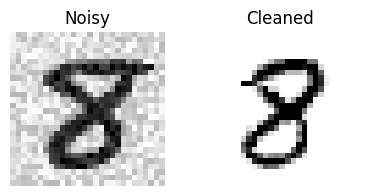

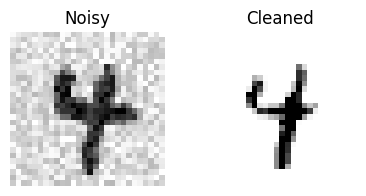

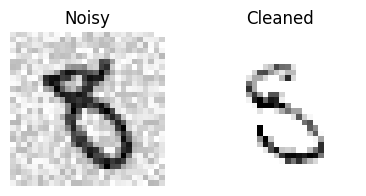

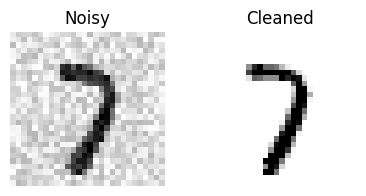

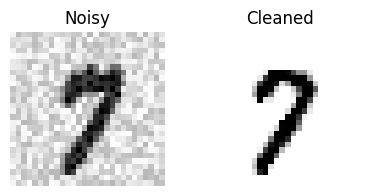

In [30]:
x_train, x_test = train_test_split(
    x.astype(int) , test_size=0.2, random_state=42
)


noise_train = np.random.randint(0, 100, size=x_train.shape)
x_train_noisy = x_train + noise_train

noise_test  = np.random.randint(0, 100, size=x_test.shape)
x_test_noisy  = x_test  + noise_test

# Targets are the original clean images
y_train_mod = x_train.copy()
y_test_mod  = x_test.copy()

# training
knn_clf = (
    KNeighborsClassifier(n_neighbors=3, n_jobs=-1)
)
knn_clf.fit(x_train_noisy, y_train_mod)

x_test_cleaned = knn_clf.predict(x_test_noisy)

# plot one digit
def plot_digit(arr, title=None):
    img = arr.reshape(28, 28)
    plt.imshow(img, cmap=mpl.cm.binary, interpolation='nearest')
    plt.axis('off')
    if title:
        plt.title(title)

#  Show first 5 noisy → cleaned examples
import matplotlib as mpl
for i in range(5):
    plt.figure(figsize=(4, 2))
    plt.subplot(1, 2, 1)
    plot_digit(x_test_noisy.iloc[i].to_numpy(), title='Noisy')
    plt.subplot(1, 2, 2)
    plot_digit(x_test_cleaned[i], title='Cleaned')
    plt.tight_layout()
    plt.show()

In [ ]:
'''
Q3) Create a multilabel array containing two target labels for each digit image of letter dataset: the first
indicates whether or not the letter is small (A to H) and the second indicates whether or not it is
vowel. Train a KNeighborsClassifier using the multiple targets array. Use train-test split of 60:40.
Analyze the accuracy and F1 score on all instances of test dataset. Hint: the dataset can be loaded
using sklearn.datasets. fetch_openml function.
'''

letter = fetch_openml('letter', version=1, as_frame=False)
x, y = letter['data'], letter['target']
print('X shape:', x.shape)
print('y shape:', y.shape)


is_small = np.isin(y, list('ABCDEFGH'))
is_vowel = np.isin(y, list('AEIOU'))
y_multilabel = np.column_stack([is_small, is_vowel])

x_train, x_test, y_train, y_test = train_test_split(
    x, y_multilabel, test_size=0.4, random_state=42
)

# training
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_train)
y_pred = knn_clf.predict(x_test)

# metrics
acc_small = accuracy_score(y_test[:, 0], y_pred[:, 0])
acc_vowel = accuracy_score(y_test[:, 1], y_pred[:, 1])
f1_small = f1_score(y_test[:, 0], y_pred[:, 0])
f1_vowel = f1_score(y_test[:, 1], y_pred[:, 1])

# Displaying the results
df = pd.DataFrame({
    "Accuracy": [acc_small, acc_vowel],
    "F1 Score": [f1_small, f1_vowel]
}, index=["small", "vowel"])
print(df)

X shape: (20000, 16)
y shape: (20000,)
       Accuracy  F1 Score
small  0.974000  0.957980
vowel  0.980875  0.950883
